# Problem Set #3
## Part 2: Scalar regression
### Xi Chen

In [62]:
import numpy as np
from keras.datasets import boston_housing
from keras import models
from keras import layers
from keras import regularizers

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the Boston housing dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


In [3]:
# Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [33]:
# 10-fold cross validiation
k = 10
num_val_samples = len(train_data) // k
num_epochs = 500

### In the following, I tested 4 different models and compared their performances.

## Model 1 

In [31]:
# Building the network
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', 
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', 
                  loss='mse', 
                  metrics=['mse'])
    return model

In [34]:
all_mse_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], 
                                         train_data[(i + 1) * num_val_samples:]], 
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], 
                                            train_targets[(i + 1) * num_val_samples:]],
                                           axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, 
                        validation_data = (val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['mean_squared_error']
    
    all_mse_histories.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [35]:
np.mean(all_mse_histories)

3.1102479639588196

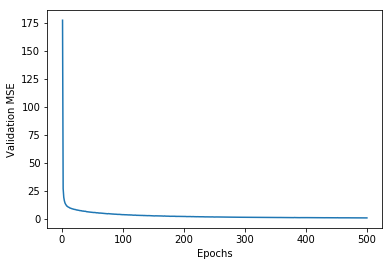

In [36]:
average_mse_history = [np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [37]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    
    return smoothed_points   

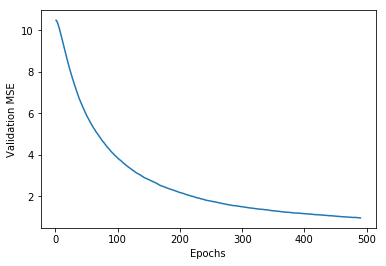

In [38]:
smooth_mse_history = smooth_curve(average_mse_history[10:])

plt.plot(range(1, len(smooth_mse_history) + 1), smooth_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

## Model 2 - Dropout

In [53]:
def build_model_2():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', 
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', 
                  loss='mse', 
                  metrics=['mse'])
    return model

In [54]:
all_mse_histories_2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], 
                                         train_data[(i + 1) * num_val_samples:]], 
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], 
                                            train_targets[(i + 1) * num_val_samples:]],
                                           axis=0)
    model = build_model_2()
    history = model.fit(partial_train_data, partial_train_targets, 
                        validation_data = (val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['mean_squared_error']
    
    all_mse_histories_2.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [55]:
np.mean(all_mse_histories_2)

23.815929004318782

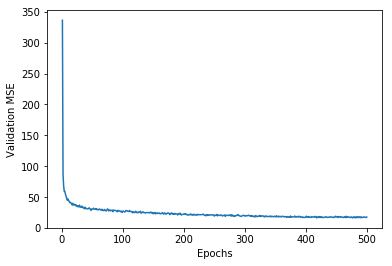

In [56]:
average_mse_history_2 = [np.mean([x[i] for x in all_mse_histories_2]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history_2) + 1), average_mse_history_2)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

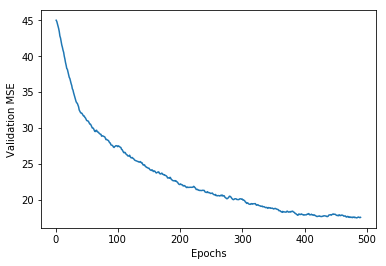

In [57]:
smooth_mse_history_2 = smooth_curve(average_mse_history_2[10:])

plt.plot(range(1, len(smooth_mse_history_2) + 1), smooth_mse_history_2)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

## Model 3 - L1

In [60]:
# Building the network
def build_model_3():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],),
                          kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(64, activation='relu',
                          kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', 
                  loss='mse', 
                  metrics=['mse'])
    return model

In [63]:
all_mse_histories_3 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], 
                                         train_data[(i + 1) * num_val_samples:]], 
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], 
                                            train_targets[(i + 1) * num_val_samples:]],
                                           axis=0)
    model = build_model_3()
    history = model.fit(partial_train_data, partial_train_targets, 
                        validation_data = (val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['mean_squared_error']
    
    all_mse_histories_3.append(mse_history)

processing fold # 0
Instructions for updating:
keep_dims is deprecated, use keepdims instead
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [64]:
np.mean(all_mse_histories_3)

3.564780067082579

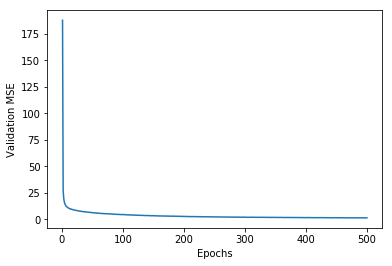

In [65]:
average_mse_history_3 = [np.mean([x[i] for x in all_mse_histories_3]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history_3) + 1), average_mse_history_3)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

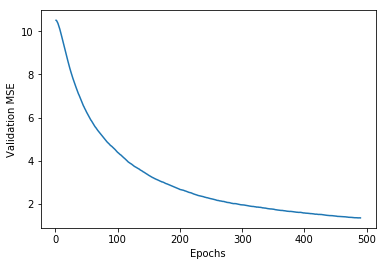

In [66]:
smooth_mse_history_3 = smooth_curve(average_mse_history_3[10:])

plt.plot(range(1, len(smooth_mse_history_3) + 1), smooth_mse_history_3)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

## Model 4 - L2

In [69]:
# Building the network
def build_model_4():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],),
                          kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(64, activation='relu',
                          kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', 
                  loss='mse', 
                  metrics=['mse'])
    return model

In [70]:
all_mse_histories_4 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], 
                                         train_data[(i + 1) * num_val_samples:]], 
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], 
                                            train_targets[(i + 1) * num_val_samples:]],
                                           axis=0)
    model = build_model_4()
    history = model.fit(partial_train_data, partial_train_targets, 
                        validation_data = (val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['mean_squared_error']
    
    all_mse_histories_4.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [71]:
np.mean(all_mse_histories_4)

3.418942607537053

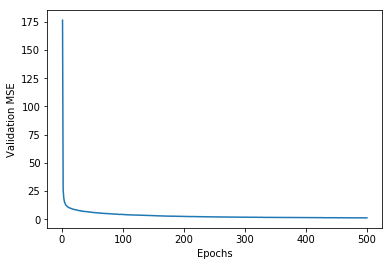

In [72]:
average_mse_history_4 = [np.mean([x[i] for x in all_mse_histories_4]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history_4) + 1), average_mse_history_4)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

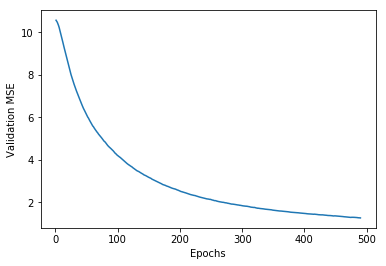

In [73]:
smooth_mse_history_4 = smooth_curve(average_mse_history_4[10:])

plt.plot(range(1, len(smooth_mse_history_4) + 1), smooth_mse_history_4)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

##  Final Model 

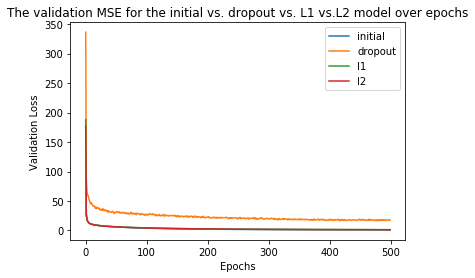

In [76]:
plt.plot(average_mse_history)
plt.plot(average_mse_history_2)
plt.plot(average_mse_history_3)
plt.plot(average_mse_history_4)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['initial', 'dropout', 'l1', 'l2'])
plt.title('The validation MSE for the initial vs. dropout vs. L1 vs.L2 model over epochs')
plt.show()

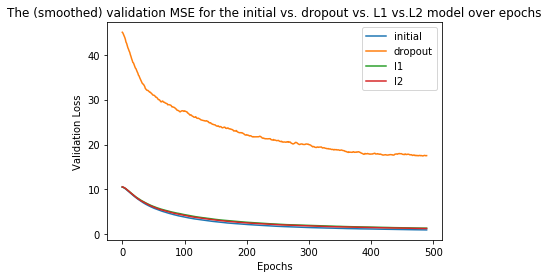

In [78]:
plt.plot(smooth_mse_history)
plt.plot(smooth_mse_history_2)
plt.plot(smooth_mse_history_3)
plt.plot(smooth_mse_history_4)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['initial', 'dropout', 'l1', 'l2'])
plt.title('The (smoothed) validation MSE for the initial vs. dropout vs. L1 vs.L2 model over epochs')
plt.show()

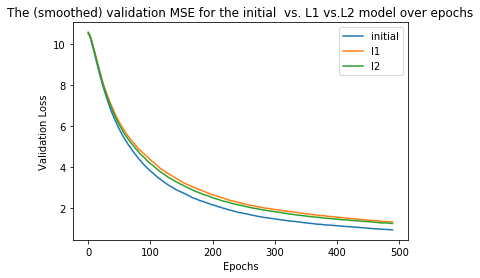

In [79]:
plt.plot(smooth_mse_history)
plt.plot(smooth_mse_history_3)
plt.plot(smooth_mse_history_4)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['initial', 'l1', 'l2'])
plt.title('The (smoothed) validation MSE for the initial  vs. L1 vs.L2 model over epochs')
plt.show()

### Comment: Compared to the dropout model, the initial model, the L1, the L2 model have similarily better performances. As showed in the graphs above, the best model is Model 1.

In [103]:
model = build_model()
model.fit(train_data, train_targets, epochs=138, batch_size=5, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 1s 10ms/step


In [104]:
test_mse_score

10.236978456085803

### Comment: Using all the training data, the test set MSE based on my best model is about 10.237.